In [16]:
from code_.thinkbayes import Suite, Pmf, Pdf
from code_ import thinkbayes
import numpy as np
import matplotlib.pyplot as plt

OBSERVED_GAP_TIMES = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]

In [99]:
def plot_multiple(*args, pdf=False):
    if not pdf:
        for function in args:
            x, y = [], []
            for k, v in function.GetDict().items():
                x.append(k)
                y.append(v)
            plt.plot(x, y, label=function.name)
    else:
        n = 20
        for function in args:
            x, y = [], []
            for i in range(n+1):
                x.append(i)
                y.append(function.Density(i*60)[0])
            plt.plot(x, y, label=function.name)
    plt.legend()
    plt.grid()
    plt.show()

    return
    
class gapTimes(Pmf):
    def __init__(self, gap_times, name=''):
        Pmf.__init__(self)
        for t in gap_times:
            self.Set(t, 1)
        self.Normalize()
        self.pdf = thinkbayes.EstimatedPdf(gap_times)

def PmfOfWaitTime(pmf_zb):
    metapmf = thinkbayes.Pmf()
    for gap, prob in pmf_zb.Items():
        uniform = thinkbayes.MakeUniformPmf(0, gap, n=10)
        metapmf.Set(uniform, prob)
    pmf_y = thinkbayes.MakeMixture(metapmf)
    return pmf_y
        

In [100]:
pmf = gapTimes(OBSERVED_GAP_TIMES, name='gapTimesUnbiased')
pmf_y = PmfOfWaitTime(pmf)
pmf_y.Mean()

234.97761194029871

In [94]:
new_pmf = pmf.Copy()
new_pmf.name = 'gapTimesBiased'
for x, p in pmf.Items():
    # print(x, p)
    new_pmf.Mult(x, x)
new_pmf.Normalize()

469.95522388059686

In [80]:
new_sample = []
n = 200
for i in range(n):
    new_sample.append(new_pmf.Random())

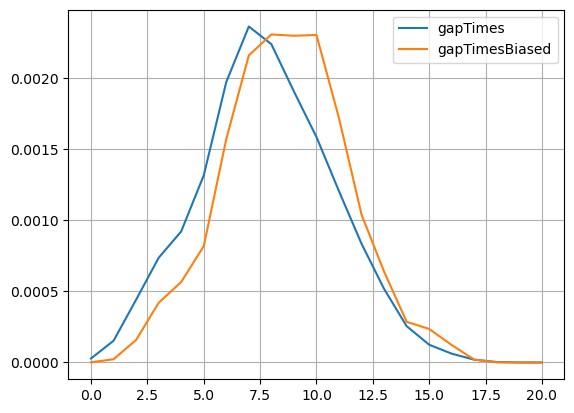

In [81]:
new_pdf = thinkbayes.EstimatedPdf(new_sample)
new_pdf.name = 'gapTimesBiased'
pmf.pdf.name = 'gapTimes'
plot_multiple(pmf.pdf, new_pdf, pdf=True)

In [82]:
20/3

6.666666666666667

In [86]:
pmf.Mean()/60

7.8325870646766145

In [85]:
new_pmf.Mean()/60

8.805196324409016

In [10]:
new_pmf.Items()

dict_items([(428.0, 0.013592911360243914), (705.0, 0.022390192777971867), (407.0, 0.012925969447708581), (465.0, 0.014767999491853784), (433.0, 0.013751707053704708), (425.0, 0.013497633944167437), (204.0, 0.00647886429320037), (506.0, 0.01607012417823229), (143.0, 0.004541556832978691), (351.0, 0.011147457680947695), (450.0, 0.014291612411471406), (598.0, 0.01899196493791089), (464.0, 0.014736240353161624), (749.0, 0.023787594880426848), (341.0, 0.010829866294026108), (586.0, 0.01861085527360498), (754.0, 0.02394639057388764), (256.0, 0.00813033950519262), (378.0, 0.01200495442563598), (435.0, 0.013815225331089025), (176.0, 0.005589608409819927), (405.0, 0.012862451170324264), (360.0, 0.011433289929177123), (519.0, 0.016482992981230352), (648.0, 0.020579921872518822), (374.0, 0.011877917870867345), (483.0, 0.015339663988312642), (537.0, 0.01705465747768921), (578.0, 0.018356782164067716), (534.0, 0.016959380061612732), (577.0, 0.01832502302537556), (619.0, 0.01965890685044622), (538.0

In [87]:
import math

In [92]:
np.mean(
    # [x for x in range(1, 11, 1)]
    np.random.choice(
        list(range(1, 5, 1)), 200
    )
)

2.49

In [93]:
0.33*5 * 0.33*10 + 0.33*5

7.0950000000000015